In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score,f1_score


In [2]:
df1= pd.read_csv('fake_job_postings.csv')
df2= pd.read_csv('games.csv')

# Soal 1(a)

# 1. Ringkasan mengenai data

### A) Deskripsi Setiap fitur

In [3]:
# Melihat deskripsi statistik dari kelompok fitur numerik
df1.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df2.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [5]:
# Melihat deskripsi statistik dari kelompok fitur kategorik
display(df1.describe(include=object))

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17880,17534,6333,2868,14572,17879,15185,10670,14409,10830,9775,12977,11425
unique,11231,3105,1337,874,1709,14801,11968,6205,5,7,13,131,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,311,718,551,142,726,379,410,726,11620,3809,5145,1734,1749


In [6]:
display(df2.describe(include=object))

,id,victory_status,winner,increment_code,white_id,black_id,moves,opening_eco,opening_name
count,20058,20058,20058,20058,20058,20058,20058,20058,20058
unique,19113,4,3,400,9438,9331,18920,365,1477
top,XRuQPSzH,resign,white,10+0,taranga,taranga,e4 e5,A00,Van't Kruijs Opening
freq,5,11147,10001,7721,72,82,27,1007,368


### B) Jumlah Atribut

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

> Pada dataset fake_job_postings.csv terlihat bahwa mempunyai 5 atribut numerik dan 13 atribut object. Total  pada dataset tersebut memiliki 18 atribut.

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


Pada dataset games.csv terlihat bahwa mempunyai 6 atribut numerik dan 10 atribut object. Total pada dataset tersebut memiliki 16 atribut.

### C) Jumlah Data 

In [9]:
print(df1.shape)
print(df2.shape)

(17880, 18)
(20058, 16)


### D) Missing Values

In [10]:
def cek_missing_values(data):
    col_na = data.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(data)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

print("Missing Values pada fake_job_postings.csv")
print(cek_missing_values(df1))
print("--------------------")
print("Missing Values pada games.csv")
print(cek_missing_values(df2))

Missing Values pada fake_job_postings.csv
                     Total   Percent
salary_range         15012  0.839597
department           11547  0.645805
required_education    8105  0.453300
benefits              7210  0.403244
required_experience   7050  0.394295
function              6455  0.361018
industry              4903  0.274217
employment_type       3471  0.194128
company_profile       3308  0.185011
requirements          2695  0.150727
location               346  0.019351
description              1  0.000056
None
--------------------
Missing Values pada games.csv
Empty DataFrame
Columns: [Total, Percent]
Index: []
None


> Dari data diatas terlihat bahwa beberapa data invalid disetiap firu

### E) Jumlah duplikasi data

In [11]:
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
429


### E) Kemungkinan adanya outlier

In [12]:
num_cols_1 = df1.select_dtypes([np.number])
num_cols_2 = df2.select_dtypes([np.number])

In [13]:
list_outlier = []
def cek_outlier(data):
    for i in data.columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3-Q1
        RLB = Q1-1.5*IQR
        RUB = Q3+1.5*IQR
        count_outlier = ((data[i]<RLB) | (data[i]>RUB)).sum()
        if count_outlier > 0 :
            print(i + " =  " + str(count_outlier))
            list_outlier.append(i)

print("Outlier pada fake_job_postings.csv")
print(cek_outlier(num_cols_1))
print("--------------------")
print("Outlier pada games.csv")
print(cek_outlier(num_cols_2))

Outlier pada fake_job_postings.csv
telecommuting =  767
has_company_logo =  3660
fraudulent =  866
None
--------------------
Outlier pada games.csv
created_at =  1939
last_move_at =  1939
turns =  428
white_rating =  135
black_rating =  91
opening_ply =  899
None


> Dari hasil diatas terlihat bahwa banyak atribute yang mempunyai outlier

# 2. Eksplorasi data

### 1) Visualisasi histogram 

Untuk data set fake_job_postings.csv, diantara fitur numerik, hanya <b>fitur telecommuting,has_company_logo,dan has_questions</b> yang mempengaruhi hasil.Hal itu sisebabkan karena fitur job_id unik yang bukan fitur yang mempengaruhi hasil dan fitur fraudulent    yang merupakan target kita dalam memprediksi sehingga kedua fitur tersebut tidak mempengaruhi hasil.

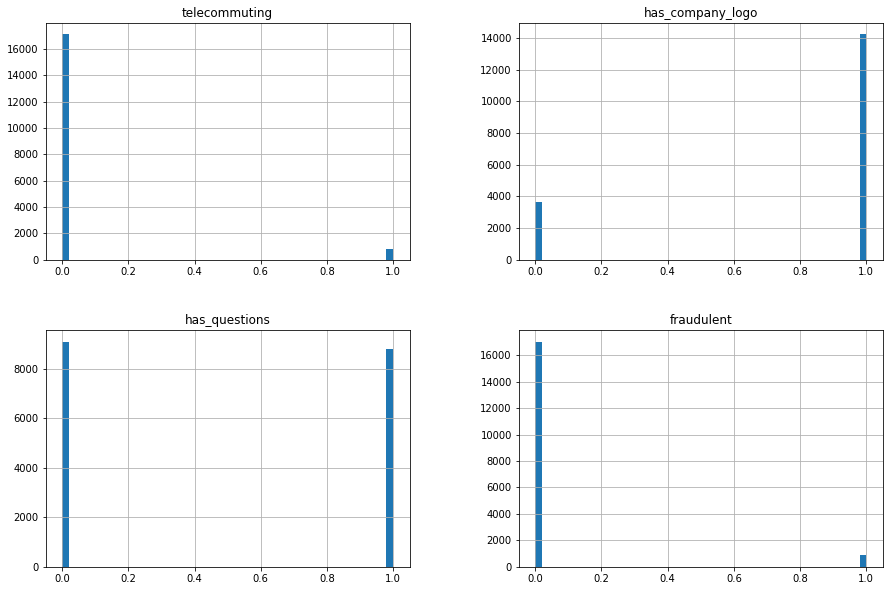

In [14]:
num_cols_features = num_cols_1.drop(columns=['job_id'],axis=1)
num_cols_features.hist(bins=50, figsize=(15,10))
plt.show()

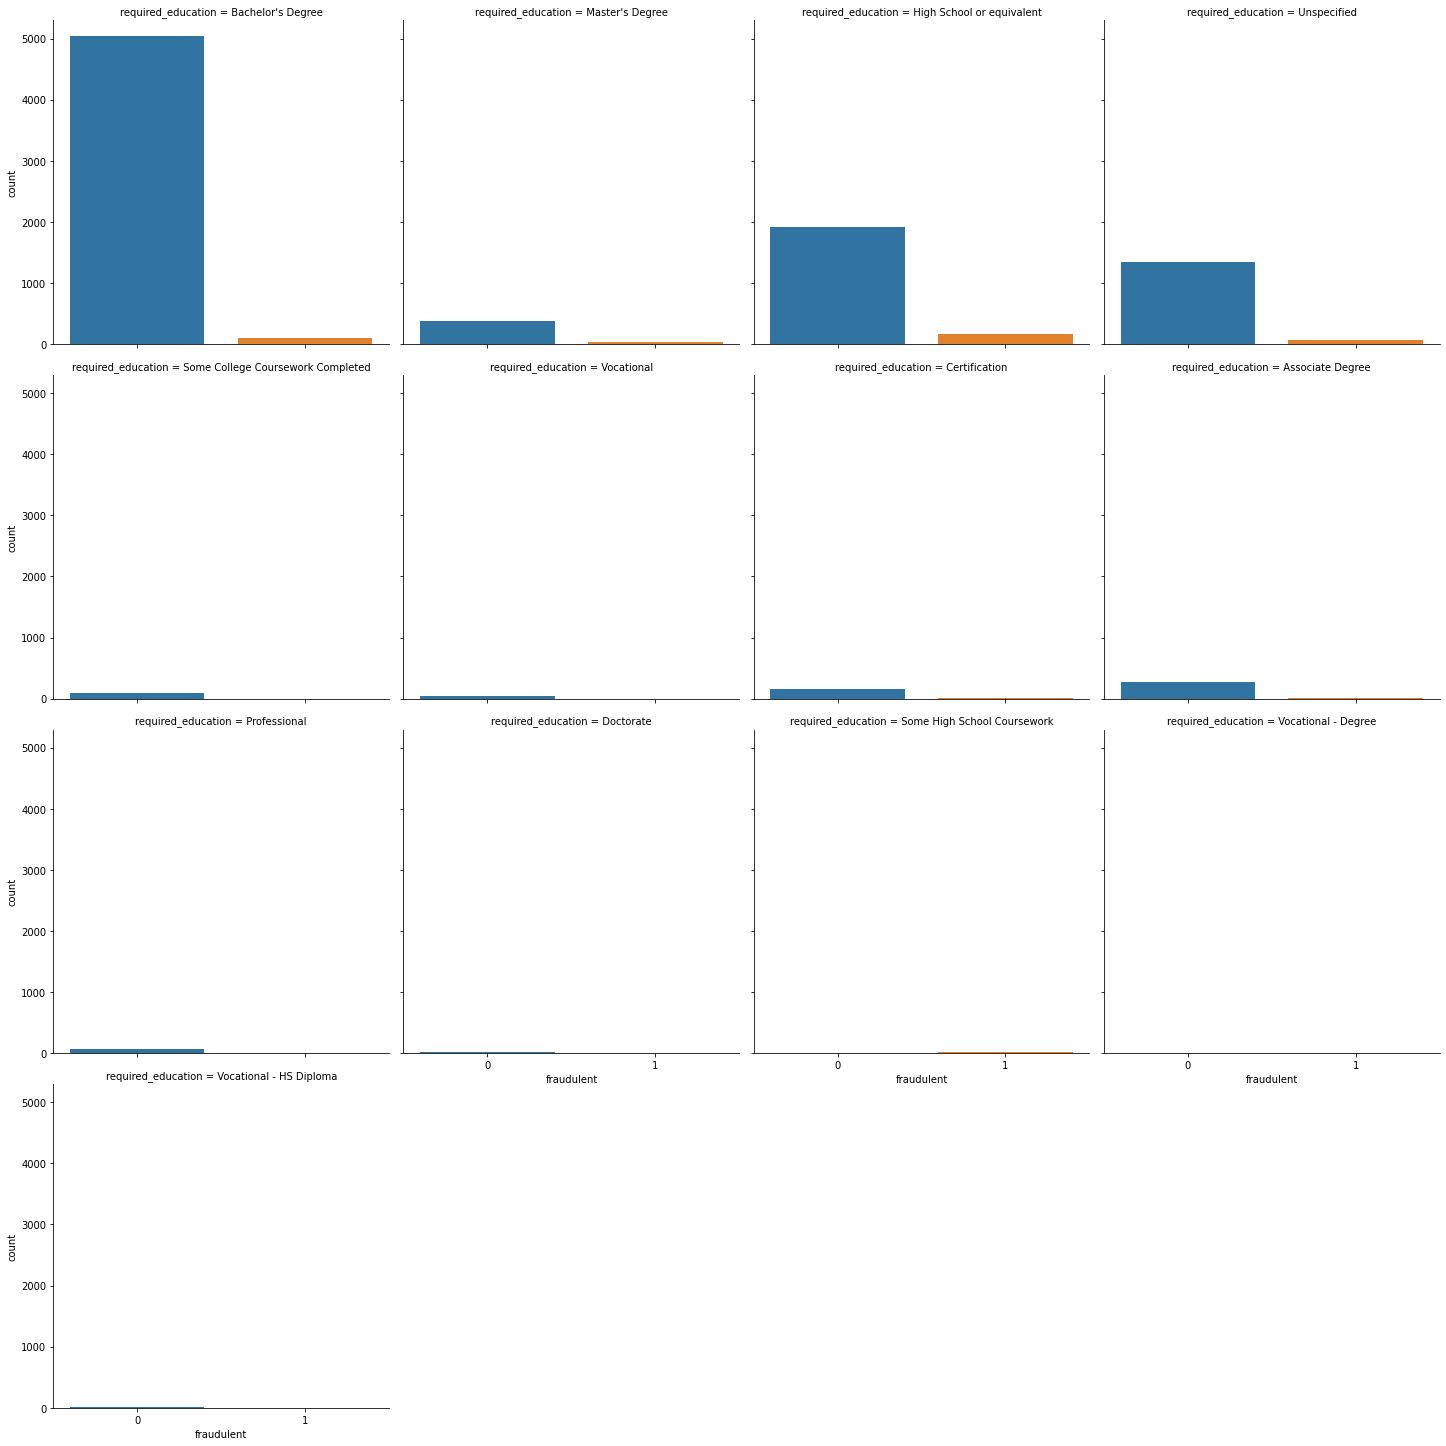

In [15]:
sns.catplot(x="fraudulent",col="required_education",data=df1,col_wrap=4,kind="count")

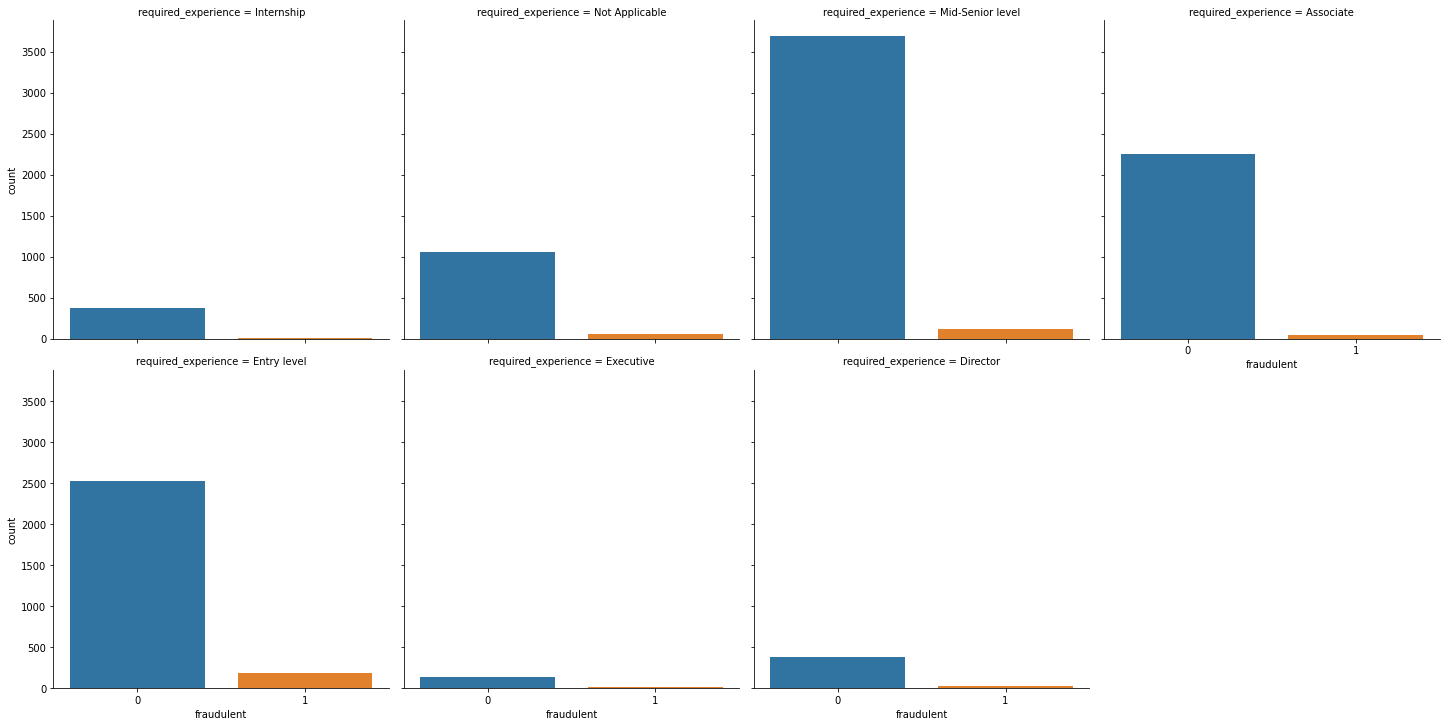

In [16]:
sns.catplot(x="fraudulent",col="required_experience",data=df1,col_wrap=4,kind="count")

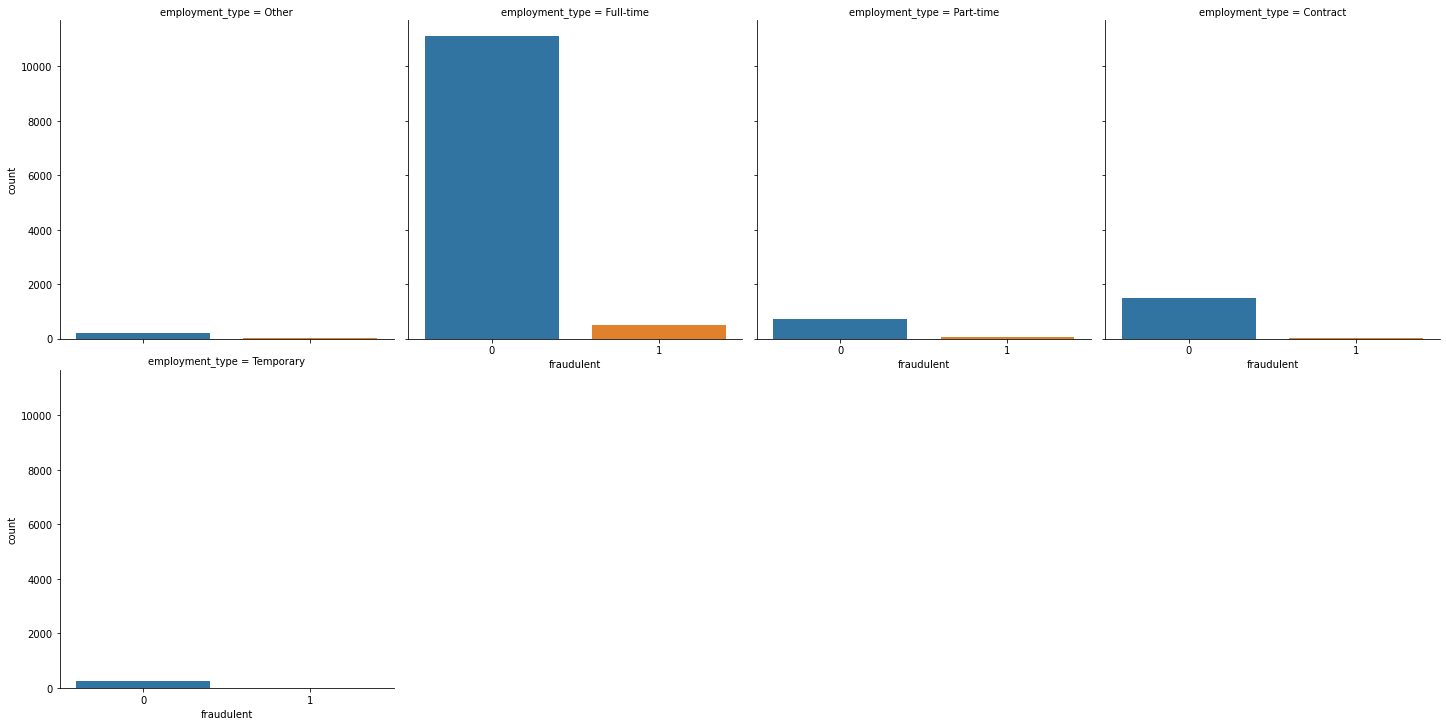

In [17]:
sns.catplot(x="fraudulent",col="employment_type",data=df1,col_wrap=4,kind="count")

Untuk data set games.csv, semua fitur numerik dapat mempengaruhi hasil. Oleh karena histogram dari setiap fitur dapat
dilihat sebagai berikut

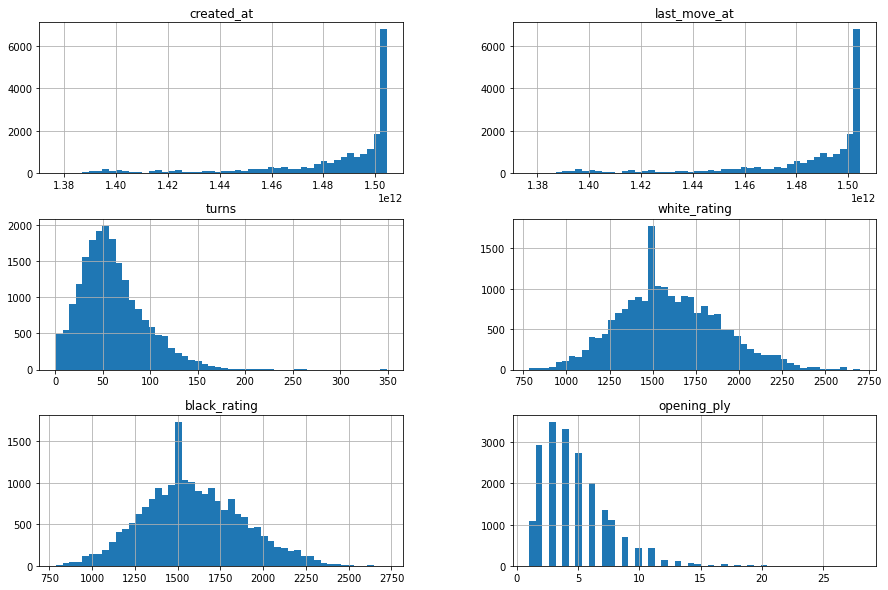

In [18]:
num_cols_2.hist(bins=50, figsize=(15,10))
plt.show()

> Dari data diatas terlihat bahwa terdapat beberapa distribusi normal, distribusi kekanan, dan distribusi kekiri pada dataset
games.csv

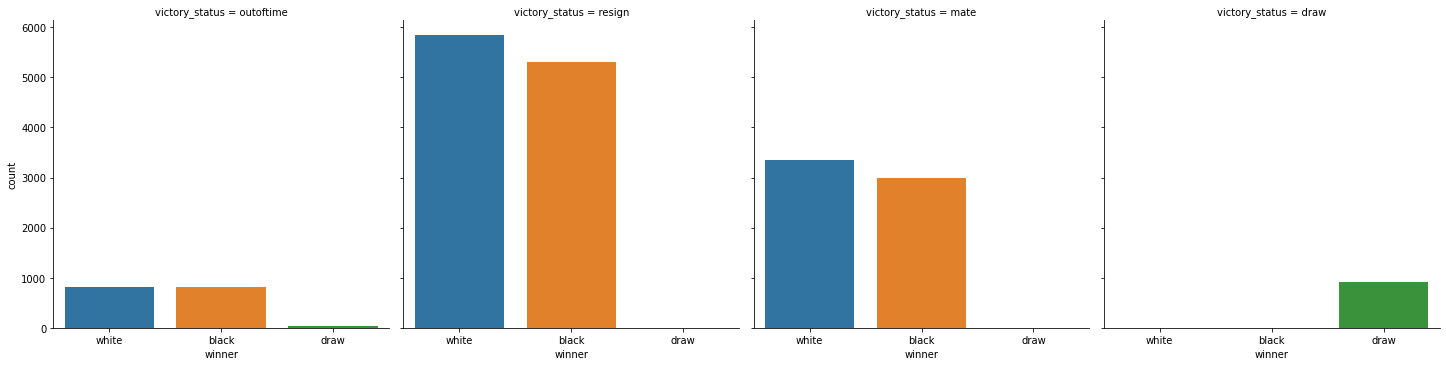

In [19]:
sns.catplot(x="winner",col='victory_status',col_wrap=4,data=df2,kind="count")

### 2) Korelasi antar fitur numerik

Text(0.5, 1.0, 'Korelasi fitur numerik fake job_postings ')

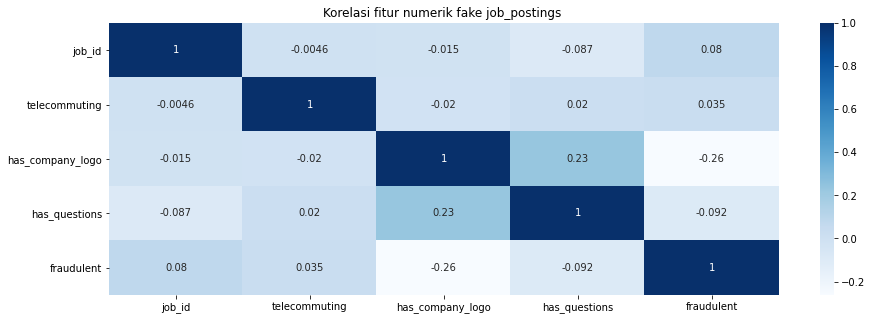

In [20]:
plt.figure(figsize=(15,5))

sns.heatmap(num_cols_1.corr(), 
        annot=True,
        cmap=plt.cm.Blues,
        xticklabels=df1.select_dtypes(np.number).columns,
        yticklabels=df1.select_dtypes(np.number).columns)
plt.title("Korelasi fitur numerik fake job_postings ")

> Dari data diatas terlihat bahwa tidak terdapat korelasi yang tinggi antar fitur sehingga kita tidak perlu melakukan
aksi apapun terhadap fitur-fitur tersebut

Text(0.5, 1.0, 'Korelasi fitur numerik games chess')

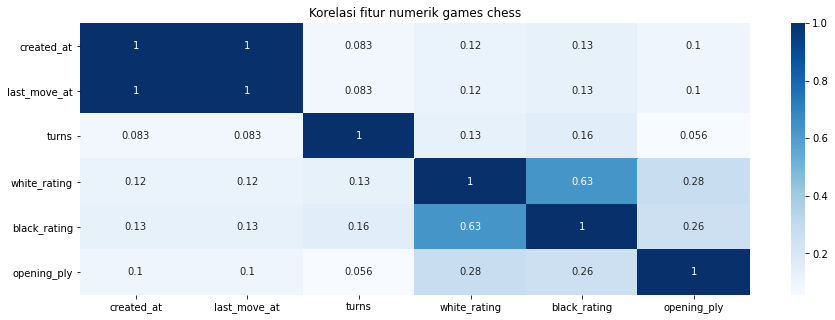

In [21]:
plt.figure(figsize=(15,5))

sns.heatmap(num_cols_2.corr(), 
        annot=True,
        cmap=plt.cm.Blues,
        xticklabels=df2.select_dtypes(np.number).columns,
        yticklabels=df2.select_dtypes(np.number).columns)
plt.title("Korelasi fitur numerik games chess")

> Dari diatas dapat terlihat bahwa terdapat korelasi fitur yang tinggi antara created_at dan last_move_at.
Hal itu masuk akal karena ketika kita analisis lagi fitur tersebut waktu mulaiakan mempunyai korelasi yang tinggi dengan waktu berakhir. Semakin cepat waktu mulai, semakin cepat juga waktu berakhir dan begitupun sebaliknya. Oleh karena itu, kita dapat hanya mengambil salah satu dari fitur tersebut sebagai fitur2 yang mempengaruhi dalam prediksi target

### 3) Visualisasi scatterplot

Kita dapat melihat scatterplot atribut untuk melihat korelasi antar fitur. Dari visualisasi dibawah ini terlihat fitur white rating dan black rating mempunyai korelasi yang positif dan juga terdapat beberapa outlier di fitur tersebut

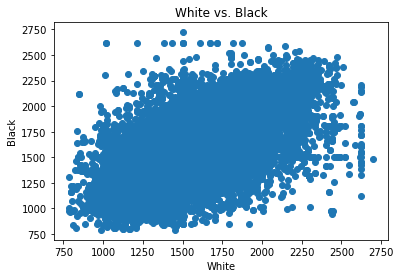

In [22]:
plt.title('White vs. Black')
plt.xlabel('White')
plt.ylabel('Black')
plt.scatter(df2['white_rating'], df2['black_rating'])
plt.show()

# Soal 1(b)

### Atribut yang  berpengaruh terhadap target class dan dapat menghasilkan metrik pengukuran error terkecil. 

#### a. Dataset fake_job_postings
Berdasarkan eksplorasi sebelumnya, terlihat bahwa fitur2 yang menurut saya berpengaruh dalam mendeteksi asli atau palsu sebuah postingan pekerjaan dan dapat menghasilkan metrik pengukuran error terkecil adalah :
Fitur employment_type, required_experience, required_education.

#### b.Dataset games chess

Berdasarkan eksplorasi sebelumnya, terlihat bahwa fitur2 yang menurut saya berpengaruh dalam  mendeteksi target pemenang dalam permainan chess dan dapat menghasilkan metrik pengukuran error terkecil adalah : Fitur victory_status.

# Soal 2(a)

# 3. Data Preprocessing And Feature Engineering

### A. Menangani Missing Values

> Dari pengecekan diatas terlihat bahwa hanya dataset fake_job_postings yang memiliki missing values.
Oleh karena itu kita hanya akan melakukan penanganan missing values pada dataset fake_job_postings sja.

- Fitur yang mempengaruhi dalam memprediksi target adalah telecommuting, has_company_logo, has_questions , location,department,salary_range,employment_type, required_experience, required_education, industry, dan function.
- Hal itu dipertimbangkan karena saya tidak menggunakan NLP pada project ini lalu saya juga mempertimbangkan bagaimana terlalu banyak missing values sehingga lebih baik di drop saja fiturnya
- Oleh karena itu, kita hanya perlu menangani missing values pada employment_type, required_experience, required_education, industry, dan function 

In [23]:
df1_new = df1.drop(['job_id','title','company_profile','description','requirements','benefits','salary_range'], axis=1)
cek_missing_values(df1_new)

                     Total   Percent
department           11547  0.645805
required_education    8105  0.453300
required_experience   7050  0.394295
function              6455  0.361018
industry              4903  0.274217
employment_type       3471  0.194128
location               346  0.019351


Saya isi missing values fitur dengan modusnya

In [24]:
for c in df1_new:
    df1_new[c] = df1_new[c].fillna(df1_new[c].value_counts().index[0])
cek_missing_values(df1_new)

Empty DataFrame
Columns: [Total, Percent]
Index: []


### B. Menangani Duplicate data

> Dari pengecekan diatas terlihat bahwa hanya dataset game chess yang memiliki duplicate data.
Oleh karena itu kita hanya akan melakukan penanganan duplicate data pada dataset game chess saja.

In [25]:
df2.drop_duplicates(keep=False,inplace=True)
print(df2.duplicated().sum())

0


### C. Menangani Outlier

#### a. Dataset fake_job_postings

In [26]:
num_cols_1 = df1_new.select_dtypes([np.number])
cek_outlier(num_cols_1)

telecommuting =  767
has_company_logo =  3660
fraudulent =  866


Dari data diatas terlihat bahwa terdapat outliers di beberapa fitur. Jika kita analisis lebih dalam lagi, fitur2 tersebut hanya mempunyai 2 nilai yaitu 1 dan 0 outlier pada tiap fitur yang mana menunjukan true or false pada fitur tersebut. Oleh karena itu, outlier pada fitur tersebut bukanlah keanehan atau kesalahan pada  pengumpulan data sehingga tidak perlu aksi apapun

#### b. Dataset game chess

In [27]:
num_cols_2 = df2.select_dtypes([np.number])
cek_outlier(num_cols_2)

created_at =  1759
last_move_at =  1759
turns =  413
white_rating =  131
black_rating =  99
opening_ply =  854


In [28]:
new = list(set(list_outlier))
new = np.array(['created_at','last_move_at','turns','white_rating','black_rating','opening_ply'])
new

array(['created_at', 'last_move_at', 'turns', 'white_rating',
       'black_rating', 'opening_ply'], dtype='<U12')

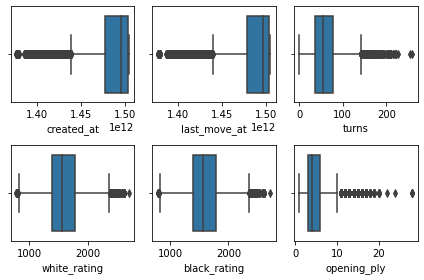

In [29]:
f, axes = plt.subplots(round(len(new)/3), 3)  
y = 0;
for name in new:
    i, j = divmod(y, 3)
    sns.boxplot(x=num_cols_2[name], ax=axes[i, j])
    y = y+1
plt.tight_layout()
plt.show()

Dari data diatas terlihat bahwa terdapat outliers di beberapa fitur. Berikut ini adalah analisis outlier tiap fitur berdasarkan gambar diatas:
1. Pada fitur created_at dan fitur last_move_at tidak perlu aksi apapun karena waktu mulai dan waktu berakhir bisa kapan saja sehingga pada fitur tersebut dapat disimpulkan tidak ada keanehan pada data
2. Pada fitue turn tidak perlu melakukan aksi apapun karena setiap pemain dapat memiliki beberapa putaran yang tidak terbatas sehingga pada fitur tersebut dapat disimpulkan tidak ada keanehan pada data
3. Pada fitur white_rating dan black_rating tidak perlu melakukan aksi apapun karena tidak terdapat outlier yang jauh dan masih wajar jika terdapat outlier pada nilai tersebut.
4. Pada fitur opening_ply tidak perlu melakukan aksi apapun karena tidak terdapat outlier yang jauh dan masih wajar jika terdapat outlier pada nilai tersebut.

### D. Data Transformation

##### a. Dataset fake_job_postings

Fitur telecommuting, has_company_logo, has_questions , location,department,salary_range,employment_type, required_experience, required_education, industry, function.

In [30]:
df1_new_num = df1_new.select_dtypes([np.number])
df1_new_cat = df1_new.select_dtypes(exclude=[np.number])
print(df1_new_num.head())
print(df1_new_cat.head())

   telecommuting  has_company_logo  has_questions  fraudulent
0              0                 1              0           0
1              0                 1              0           0
2              0                 1              0           0
3              0                 1              0           0
4              0                 1              1           0
             location department employment_type required_experience  \
0    US, NY, New York  Marketing           Other          Internship   
1      NZ, , Auckland    Success       Full-time      Not Applicable   
2       US, IA, Wever      Sales       Full-time    Mid-Senior level   
3  US, DC, Washington      Sales       Full-time    Mid-Senior level   
4  US, FL, Fort Worth      Sales       Full-time    Mid-Senior level   

  required_education                             industry  \
0  Bachelor's Degree  Information Technology and Services   
1  Bachelor's Degree            Marketing and Advertising   
2  Bachelor'

#### b. Dataset games chess

- Fitur2 yang berpengaruh dalam mendeteksi target pemenang dalam permainan chess adalah : Fitur turns, white_rating, black_rating, opening_ply,victory_status,rated,opening_eco,dan increment_code.
- Hal itu dipertimbangkan karena saya tidak menggunakan NLP pada project ini lalu saya juga mempertimbangkan bagaimana fiturnya tidak mepengaruhi dalam memprediksi target class

In [31]:
df2_new=df2
df2_new= df2_new.drop(['id','created_at','moves','opening_name','white_id','black_id','last_move_at'],axis=1)

In [32]:
df2_new_num = df2_new.select_dtypes([np.number])
df2_new_cat = df2_new.select_dtypes(exclude=[np.number])
print(df2_new_num.head())
print(df2_new_cat.head())

   turns  white_rating  black_rating  opening_ply
0     13          1500          1191            5
1     16          1322          1261            4
2     61          1496          1500            3
3     61          1439          1454            3
4     95          1523          1469            5
   rated victory_status winner increment_code opening_eco
0  False      outoftime  white           15+2         D10
1   True         resign  black           5+10         B00
2   True           mate  white           5+10         C20
3   True           mate  white           20+0         D02
4   True           mate  white           30+3         C41


### E. Menangani Categorical Variable

#### a. Dataset fake_job_postings

In [33]:
#Gunakan One Hot Encoding karena nominal variables bukan ordinal values
#dan juga karena beberapa atribut walaupun ranked variables tetapi mempunyai "Unknown" value, karena kita tidak bisa memastikan
# ranked tersebut maka tidak dapat diubah ke ordinal variable untuk menggunakan Label Encoding 
df1_new_cat=pd.get_dummies(df1_new_cat)
df1_new_cat.shape

(17880, 4635)

#### b. Dataset games chess

In [34]:
#Gunakan Label Encoding
#target = df2_new_cat.winner.replace({'black':0,'white':1,'draw':2})
#df2_new_cat=pd.get_dummies(df2_new_cat.drop(columns=['winner']))
#df2_new_cat["rated"] = df2_new_cat["rated"].astype(int)
#df2_new_cat.shape

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df2_new_cat:
    df2_new_cat[col] = label_encoder.fit_transform(df2_new_cat[col])

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### F. Scalling

In [35]:
for i in ['turns','white_rating','black_rating']:
    col = df2_new_num[i]
    diff = col.max() - col.min()
    bins = np.digitize(col, np.arange(col.min(), col.max(), (diff/10)).tolist())
    df2_new_num[i] = bins

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Soal 2(b)

### Data Cleaned

#### a. Dataset fake_job_postings

In [36]:
#Gabungkan numeric dan variable
result = [df1_new_num,df1_new_cat]
df_cleaned_1 = pd.concat(result, axis=1, join='inner')
df_cleaned_1.shape

(17880, 4639)

#### b. Dataset games chess

In [37]:
#Gabungkan numeric dan variable
result2 = [df2_new_num,df2_new_cat]
df_cleaned_2 = pd.concat(result2, axis=1, join='inner')
df_cleaned_2.shape

(19242, 9)

# 4. Menyiapkan Data

#### a. Dataset fake_job_postings

Target pada dataset ini adalah fitur fraudulent yang memiliki nilai 0 dan 1. Nilai 0 berarti job posting tersebut asli dan Nilai 1 berarti job posting tersebut palsu 

In [38]:
X_df1 = df_cleaned_1.drop(['fraudulent'],axis=1)
y_df1 = df_cleaned_1['fraudulent']

#### b. Dataset games chess

Target pada dataset ini adalah fitur winner yang memnentukan siapa pemenang dalam permainan. 0 adalah hitam, 1 adalah putih, dan 2 adalah draw

In [39]:
X_df2 = df_cleaned_2.drop(['winner'],axis=1)
y_df2 = df_cleaned_2['winner']

###  Data Upsampling

Karena dataset imbalanced(dataset tidak siembang), terdapat dua teknik yang harus dilakukan untuk menangani kumpulan data yang tidak seimbang, yaitu oversampling atau undersampling. Jika datanya terlalu besar kita dapat melakukan down sampling, tetapi karena dataset ini tidak terlalu besar, maka lakukan oversampling

#### a. Dataset fake_job_postings

Distribution of fraudulent : 17014 & 866


<AxesSubplot:>

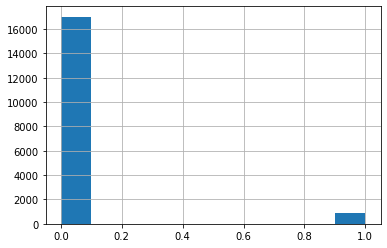

In [40]:
count = Counter(y_df1)
print('Distribution of fraudulent :', count[0], '&', count[1])
y_df1.hist()

Distribution of fraudulent: 17014 & 17014


<AxesSubplot:>

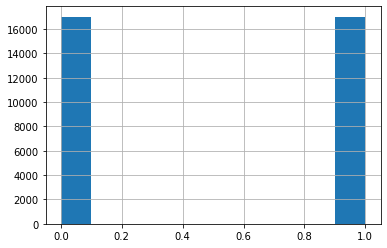

In [41]:
smote = SMOTE()
X_df1, y_df1 = smote.fit_resample(X_df1, y_df1)
count = Counter(y_df1)
print('Distribution of fraudulent:', count[0], '&', count[1])
y_df1.hist()

#### b. Dataset games chess

Distribution of Winner :  8751 & 886 & 9605


<AxesSubplot:>

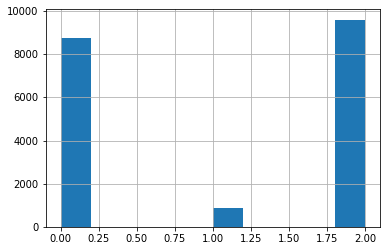

In [42]:
count2 = Counter(y_df2)
print('Distribution of Winner : ' , count2[0], '&', count2[1] ,'&', count2[2] )
y_df2.hist()

Distribution of fraudulent: 9605 & 9605 & 9605


<AxesSubplot:>

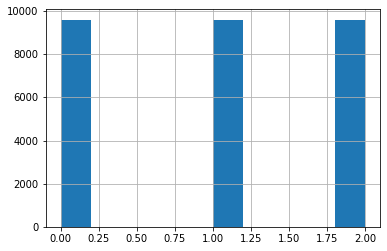

In [43]:
X_df2, y_df2 = smote.fit_resample(X_df2, y_df2)
count2 = Counter(y_df2)
print('Distribution of fraudulent:', count2[0], '&', count2[1],'&', count2[2] )
y_df2.hist()

### Splitting Data

In [44]:
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(X_df1, y_df1, test_size=0.2, random_state = 0, shuffle= True,stratify = y_df1)
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(X_df2, y_df2, test_size=0.2, random_state = 0, shuffle= True,stratify = y_df2)

# 5.Model Building

# Soal 3(a)

### Menggunakan Algoritma Naive Buyes

#### a. Dataset fake_job_postings

In [45]:
model_df1_naive = GaussianNB()
model_df1_naive.fit(X_train_df1, y_train_df1)
pred_df1 = model_df1_naive.predict(X_test_df1)

#### b. Dataset games chess

In [46]:
model_df2_naive = GaussianNB()
model_df2_naive.fit(X_train_df2, y_train_df2)
pred_df2 = model_df2_naive.predict(X_test_df2)

# Soal 3(b)

### Menggunakan Algoritma K-Nearest Neighbor

#### a. Dataset fake_job_postings

In [47]:
k_range=list(range(1, 10, 2))
param_grid = dict(n_neighbors = k_range)

In [48]:
grid_knn_df1 = GridSearchCV(KNeighborsClassifier(), param_grid,cv=5)
grid_knn_df1.fit(X_train_df1, y_train_df1)
pred_knn_df1 = grid_knn_df1.predict(X_test_df1)

#### b. Dataset games chess

In [54]:
grid_knn_df2 = GridSearchCV(KNeighborsClassifier(), param_grid,cv=5)
grid_knn_df2.fit(X_train_df2, y_train_df2)
pred_knn_df2 = grid_knn_df2.predict(X_test_df2)

# Soal 3(c)

### Metrik Evaluasi 

#### a. Dataset fake_job_postings

In [49]:
a_naive = accuracy_score(y_test_df1,pred_df1)
p_naive = precision_score(y_test_df1,pred_df1)
r_naive = recall_score(y_test_df1,pred_df1) 
f_naive = f1_score(y_test_df1,pred_df1)
print('Hasil prediksi model menggunakan Naive Buyes')
print('Accuracy:     ' + str(round(a_naive*100, 2)) + '%')
print('Precision: ' +str(round(p_naive*100, 2)) + '%')
print('Recall:    '+ str(round(r_naive*100, 2)) + '%')
print('F1 Score:    '+ str(round(f_naive*100, 2)) + '%')


Hasil prediksi model menggunakan Naive Buyes
Accuracy:     82.74%
Precision: 74.59%
Recall:    99.29%
F1 Score:    85.19%


In [52]:
a_knn = accuracy_score(y_test_df1,pred_knn_df1)
p_knn = precision_score(y_test_df1,pred_knn_df1)
r_knn = recall_score(y_test_df1,pred_knn_df1)
f_knn = f1_score(y_test_df1,pred_knn_df1)
print('Hasil prediksi model menggunakan K-Nearest Neighbor')
print('Accuracy:     ' + str(round(a_knn*100, 2)) + '%')
print('Precision: ' +str(round(p_knn*100, 2)) + '%')
print('Recall:    '+ str(round(r_knn*100,2)) + '%')
print('F1 Score:    '+ str(round(f_knn*100, 2)) + '%')

Hasil prediksi model menggunakan K-Nearest Neighbor
Accuracy:     89.47%
Precision: 83.23%
Recall:    98.85%
F1 Score:    90.37%


#### b. Dataset games chess

In [50]:
a_naive_2 = accuracy_score(y_test_df2,pred_df2)
p_naive_2 = precision_score(y_test_df2,pred_df2,average='micro')
r_naive_2 = recall_score(y_test_df2,pred_df2,average='micro') 
f_naive_2 = f1_score(y_test_df2,pred_df2,average='micro')
print('Hasil prediksi model menggunakan Naive Buyes')
print('Accuracy:     ' + str(round(a_naive_2*100, 2)) + '%')
print('Precision: ' +str(round(p_naive_2*100, 2)) + '%')
print('Recall:    '+ str(round(r_naive_2*100,2)) + '%')
print('F1 Score:    '+ str(round(f_naive_2*100, 2)) + '%')

Hasil prediksi model menggunakan Naive Buyes
Accuracy:     73.03%
Precision: 73.03%
Recall:    73.03%
F1 Score:    73.03%


In [55]:
a_knn_2 = accuracy_score(y_test_df2,pred_knn_df2)
p_knn_2 = precision_score(y_test_df2,pred_knn_df2,average='micro')
r_knn_2 = recall_score(y_test_df2,pred_knn_df2,average='micro')
f_knn_2 = f1_score(y_test_df2,pred_knn_df2,average='micro')
print('Hasil prediksi model menggunakan K-Nearest Neighbor')
print('Accuracy:     ' + str(round(a_knn_2*100, 2)) + '%')
print('Precision: ' +str(round(p_knn_2*100, 2)) + '%')
print('Recall:    '+ str(round(r_knn_2*100,2)) + '%')
print('F1 Score:    '+ str(round(f_knn_2*100, 2)) + '%')

Hasil prediksi model menggunakan K-Nearest Neighbor
Accuracy:     69.82%
Precision: 69.82%
Recall:    69.82%
F1 Score:    69.82%


# Saoal 4

###  Menggunakan Algoritma SVC dan linear SVC pada Dataset Fake Job Posting

#### SVC

In [56]:
param_grid = dict(C = k_range)
clf_grid_svc = GridSearchCV(SVC(),param_grid,cv=5)

clf_grid_svc.fit(X_train_df1,y_train_df1)

pred_df1_svc = clf_grid_svc.predict(X_test_df1)

In [57]:
a_svc = accuracy_score(y_test_df1,pred_df1_svc)
p_svc = precision_score(y_test_df1,pred_df1_svc)
r_svc = recall_score(y_test_df1,pred_df1_svc)
f_svc = f1_score(y_test_df1,pred_df1_svc)
print('Hasil prediksi model menggunakan SVC')
print('Accuracy:     ' + str(round(a_svc*100, 2)) + '%')
print('Precision: ' +str(round(p_svc*100, 2)) + '%')
print('Recall:    '+ str(round(r_svc*100,2)) + '%')
print('F1 Score:    '+ str(round(f_svc*100, 2)) + '%')

Hasil prediksi model menggunakan SVC
Accuracy:     98.8%
Precision: 99.4%
Recall:    98.18%
F1 Score:    98.79%


# Soal 5

### Menggunakan Algoritma Random Forest DecisionTreeClassifier pada Dataset Game Chess

In [51]:
classifiers = [[RandomForestClassifier(),'Random Forest'], [DecisionTreeClassifier(), 'DecisionTreeClassifier']]

accuracy_list = []
precision_list = []
recall_list = []
f1score_list = []

for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    cls= model.fit(X_train_df2, y_train_df2)
    
    pred = cls.predict(X_test_df2)

    accuracy = accuracy_score(y_test_df2,pred)
    precision = precision_score(y_test_df2,pred,average='micro') 
    recall= recall_score(y_test_df2,pred,average='micro') 
    f1score= f1_score(y_test_df2,pred,average='micro')

   
    
    accuracy_list.append(accuracy)
    precision_list.append(recall)
    recall_list.append(accuracy)
    f1score_list.append(recall)
    
   
    print(model_name, 'Accuracy:     ' + str(round(accuracy*100, 2)) + '%')
    print(model_name,'Precision:    '+ str(round(precision*100, 2)) + '%')
    print(model_name,'Recall:    '+ str(round(recall*100, 2)) + '%')
    print(model_name,'F1-Score:    '+ str(round(f1score*100, 2)) + '%')
    
    print("\n")


Random Forest Accuracy:     74.32%
Random Forest Precision:    74.32%
Random Forest Recall:    74.32%
Random Forest F1-Score:    74.32%


DecisionTreeClassifier Accuracy:     72.71%
DecisionTreeClassifier Precision:    72.71%
DecisionTreeClassifier Recall:    72.71%
DecisionTreeClassifier F1-Score:    72.71%


